# Neural Networks with Tensorflow 🧠🧠

Now that we have learned some theory and code free practical intuition about neural networks as well as the basics of data manipulation with tensorflow, it is time to startbuild models ourselves with its deep learning module: Keras!

## What will you lean in this course?

This course will focus on building our first neural networks using python code with the help of tensorflow and keras.

* The layer class
  * Dense layer
  * BatchNormalization layer
  * DropOut layer
* Activation functions  
* Regularizers
* The Model class
  * The sequential class
  * Input class / Make model from input and output
  * Make a forward pass with the model
  * Manipulations on model objects
    * Extract outputs with get_layer()
    * Extract weights with .tranaible_variables attribute
    * Manually change weights
* Prepare the model for training
  * Loss functions
  * Optimizers
    * ADAM
    * Learning rate schedule
  * Compile
* Model training
* Make predictions
* Load and save models
  * Checkpoints
  * Save 
  * Load

Everything in Keras is organized by `Class`, each building block of a deep learning model will require objects from a specific class, let's explore them one by one!


## The Layer class 🚀🚀

You can learn everything about the Layer class in the <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer">documentation</a>. It is a class of objects that represent different types of neuron layers to be added to neural network achitectures.

### The Dense layer 💃

The Dense layer is your standard fully connected (or densely connected) neuron layer.

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/Dense2.png" />

 It is a neuron that has a parameter assigned for each input value that is given to it, combines them before applying an activation function, let's see how to use it :

In [1]:
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
import tensorflow as tf
from tensorflow.keras.layers import Dense # all the layers are in tf.keras.layers

dense = Dense(units=2, activation="relu", input_shape=[3,])
# units: the number of neurons on the layer
# activation: the choice of activation function, the most common activation
#    functions can be named with strings, but you can use keras functions
#    or custom functions instead!
# input_shape: is optional, it can be either a list or tuple indicating the shape
#    of what will be entering the layer, we'll learn more about this later in the 
#    lecture

### BatchNormalization Layer 📊

This we have not seen yet during the demo with tensorflow playground, it is a special layer whose role is not to learn patterns in the data but rather as its name indicates, to normalize the output of the preceeding layer in order for its values to be scaled accross one batch of data.

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/BatchNorm3.png" />

As you see in the figure, each of the outputs from the previous layer is normalized independently so each of them has a mean of $0$ and a standard deviaition of $1$.

Of course for each new batch passing forward the normalization will be fitted again on the batch of outputs preceeding the BatchNormalization layer and scaled accordingly.

Now let's see how we can create such a layer with keras!

In [2]:
from tensorflow.keras.layers import BatchNormalization
bn = BatchNormalization()
# That's it you usually will not need anything else in order to instanciate
# a batch normalization layer, but feel free to check the documentation
# for additional information!

One last thing you need to know about batch normalization, since we are basing the normalization on batches that the networks sees throughout the training, and as those change all the time, this layer will work differently during training and inference (the moment you ask the model to make a prediction after the training is done).

During inference, this layer will use a moving average (that you have studied during the lecture on time series) of the mean and standard deviation calculated during the training process so that the normalization parameters are adapted to all the training data as best as possible. You won't have to worry so much about this in practice, but feel free to check the documentation for more details on how this layer works during inference.

### DropOut ♻️

The DropOut layer is also not a trainable layer, it does not help the model detect patterns in the data, rather it helps prevent overfitting.

In works in the following way, you can place the DropOut layer between two other layers, what it does is at each bach of data passing forward in the network it will **randomly** pick a portion of the outputs from the previous layer and set them to 0. This means the next layer will only be able to see a portion of the information that the DropOut layer has not touched, and this available portion changes at every nex batch!

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/DropOut3.png" />

Let's explain how this prevents overfitting. Overfitting is what happens whenever your model fits the training data so close it's as if it learned by heart each and every example thatwas fed to it, and therefore becomes incampable of performing well on any data it has not seen before. Specifically for neural networks, it means that the neurons in the network over specialized in detecting some feature that does not describe well the data but rather very example specific characteristics.

The DropOut layer prevents that by not allowing the network to access all the available information all the time, forcing the neurons not to specialize so much so that they can compensate for the neurons which outputs will be missing after the DropOut deactivates them. To make an analogy, if you take a shoe making workshop where all employees know how to build only one specific element of the shoe an no others, if one employee goes missing, it becomes impossible to make a single shoe, but if the employees have one main task they do well, and know enough about the other tasks, then they can compensate for others being absent and keep on making shoes. The same goes with neurons and their predictions.

Let's now discover how to create a DropOut layer with code!

In [3]:
from tensorflow.keras.layers import Dropout
do = Dropout(rate=0.2)
# The important parameter when instanciating the DropOut layer is rate, it 
# indicates the proportion of outputs from the previous that will randomly
# be set to zero at each batch passing forward.
# The closer to one, the higher proportion of outputs set to zero and harder
# it will be for the model to overfit, but also to train
# The closer to zero, the lower proportion of outputs set to zero and the easier
# it will be for the model to train, but also overfit

## Activation functions 💡💡

An exhaustive list of all pre-implemented activation functions in tensorflow may be found at <a href="https://www.tensorflow.org/api_docs/python/tf/keras/activations">this link</a>. 

Activation functions can be used in different forms in tensorflow, they maybe added as an argument of layer objects and therefore take the form of character strings or functions:

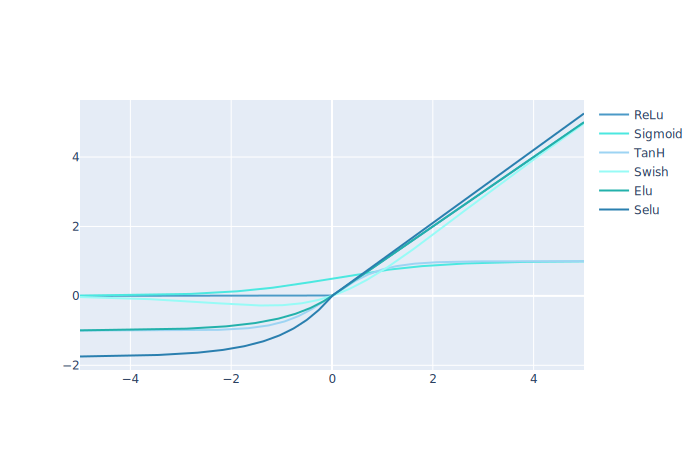

In [4]:
from tensorflow.keras.activations import * # contains all the ativation functions
# in the form of python functions
import numpy as np
from plotly import graph_objects as go

x = np.linspace(-5,5,500)

fig = go.Figure(data=[
                      go.Scatter(x=x,
                                 y=relu(x), # relu activation function
                                 mode = "lines",
                                 name = "ReLu",
                                 line=dict(
                                     color=color_chart[0]
                                 )),
                      go.Scatter(x=x,
                                 y=sigmoid(x), # sigmoid activation function
                                 mode = "lines",
                                 name = "Sigmoid",
                                 line=dict(
                                     color=color_chart[1]
                                 )),
                      go.Scatter(x=x,
                                 y=tanh(x), # tanh activation function
                                 mode = "lines",
                                 name = "TanH",
                                 line=dict(
                                     color=color_chart[2]
                                 )),
                      go.Scatter(x=x,
                                 y=swish(x), # swish activation function
                                 mode = "lines",
                                 name = "Swish",
                                 line=dict(
                                     color=color_chart[3]
                                 )),
                      go.Scatter(x=x,
                                 y=elu(x), # elu activation function, mix of tanh and relu
                                 mode = "lines",
                                 name = "Elu",
                                 line=dict(
                                     color=color_chart[5]
                                 )),
                      go.Scatter(x=x,
                                 y=selu(x), # same as elu but converges to lower for negative values
                                 mode = "lines",
                                 name = "Selu",
                                 line=dict(
                                     color=color_chart[4]
                                 ))
])

fig.show("svg")

# another activation function we have'nt yet talked about although it will come
# in handy for multi classification problems is "softmax" we'll have many
# occasions to use it in practice.

These can all be referred to as their name as character strings: "relu", "sigmoid, "tanh" etc...

Another way of adding activation functions in a network is to use their layer form and add them as components of the network, it will simply apply the activation functions to all the outputs coming from the previous layer.

Let's see how that works with code:

In [5]:
from tensorflow.keras.layers import ReLU, LeakyReLU, ELU # not all activation
# are available in this form we are selecting three examples here

relu_ = ReLU()
lrelu = LeakyReLU(alpha=0.1) # alpha is the slope for negative input values
elu_ = ELU()

## Regularizers 📐📐

Regularizers are a class of objects that help up add regularization inside our network layers, they can be found <a href="https://www.tensorflow.org/api_docs/python/tf/keras/regularizers"> here </a>.

With them we will be able to add L1 (Lasso) regularization, L2 (Ridge), or both at the same time manually in each layer of our neural network model. Let's see how this works with code:

In [6]:
from tensorflow.keras.regularizers import L1, L2, L1L2

l1 = L1(l1=0.01) # the l1 parameter sets the strength of the regularization, the
# higher l1 is, the more parameters in the layer will be set to zero

l2 = L2(l2=0.01) # the l2 parameter indicates the strength of the regularization,
# the higher l2 is, the smaller absolut values the parameters on the lay will be

l1l2 = L1L2(l1=0.01, l2=0.1) # l1 sets the strengthof the Lasso penalty while
# l2 sets the strength of the Ridge penalty

# In order to include these in a specific layer you should proceed as follows:
dense_L2 = Dense(units=4, activation="relu", kernel_regularizer=l2)
dense_L2 = Dense(units=4, activation="relu", kernel_regularizer="l2") # applies 
# L2 regularization with default values

# This technique forces you to manually add regularization to specific layers
# as opposed to the whole model.

## The Model class 🔮🔮

The class `Model` will represent the objects containing the neural networks so that we can easily train them, make predictions very much like we did using sklearn. The only difference here is that we have many more possibilities when it comes to the way we can build different types of models.
  

### Sequential models ✈️

The easiest to build a neural network model in tensorflow is by using the subclass `Sequential`, this will let you create neural network models with layers stacked on top of each other, where the input travels from the bottom layer all the way to the top layer sequentially.

Let's see how we can build a super simple neural network model using code:

In [7]:
from tensorflow.keras.models import Sequential

# let's how we can create a model with three Dense layers by using the .add method
sequential_model = Sequential()
sequential_model.add(Dense(8,"relu", input_shape=[2])) # indicate in the first layer
# the shape of the input you will feed it
# for example tabular data with 2 columns -> input_shape = [2]
sequential_model.add(BatchNormalization())
sequential_model.add(Dense(4,"relu"))
sequential_model.add(Dense(1,"sigmoid"))

# In order to get a sense of what the model looks like, use the .summary() method
sequential_model.summary()
# Layer (type): indicates the name of the layer and its type
# Output Shape: indicates the shape of the output from the layer
# Param #: indicates the number of parameters on this layer, for example on the
#   first layer, there are 8 neurons that receive 2 variables, each neuron has
#   a weight for each incoming input, thats 2x8=16, plus one bias per neuron
#   that's 8, 16+8=24 parameters in total.

# Note on shapes: in (None,8) the None represents the batch size, but since the
# model can work with batches of any sizes it will always say None 

# Total params: Indicates the number of parameters in total in the model.
# Trainable params: Indicates the number of parameters that will be updated by
#   gradient descent during training.
# Non-trainable params: Indicates the numberof parameters that will not be updated
#   by gradient descent during training. It is the case for batchnormalization
#   parameters for example, or parameters that we expecitally chose not to train,
#   but more on that in further lectures.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 24        
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 97
Trainable params: 81
Non-trainable params: 16
_________________________________________________________________


In [8]:
# another way of building a sequential model is to directly feed a list of layers
# during instanciation:

sequential_model2 = Sequential([
                                Dense(8, "relu", input_shape=[2]),
                                BatchNormalization(),
                                Dense(4,"relu"),
                                Dense(1, "sigmoid")
])

sequential_model2.summary()

# the model is identical to the one created before even though we built them in
# different ways.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 24        
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 97
Trainable params: 81
Non-trainable params: 16
_________________________________________________________________


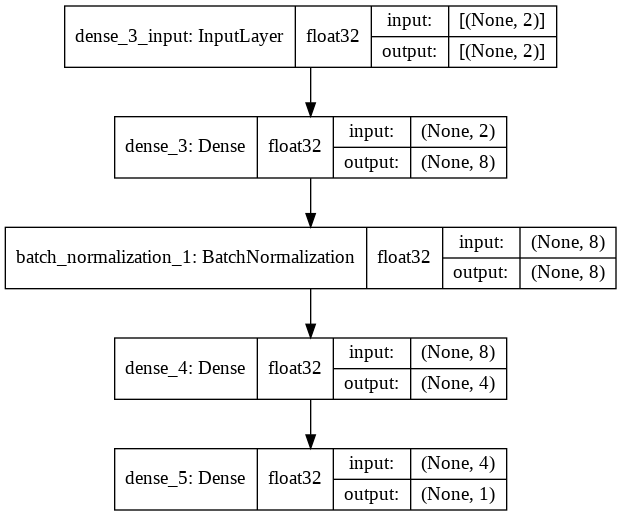

In [9]:
# Here is another way of visualizing your model that is especially convenient
# with more complicated architecture:
tf.keras.utils.plot_model(
    sequential_model,
    show_shapes=True, 
    show_dtype=True
)

### Input class / Make model from inputs and outputs 🚀

In case you want to make more complicated architectures, you will need to use inputs object, that allow you to set the shape of what needs to go into the model and then build the model layer by layer in a way we will show you in the code! 


output: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_13/Sigmoid:0', description="created by layer 'dense_13'")


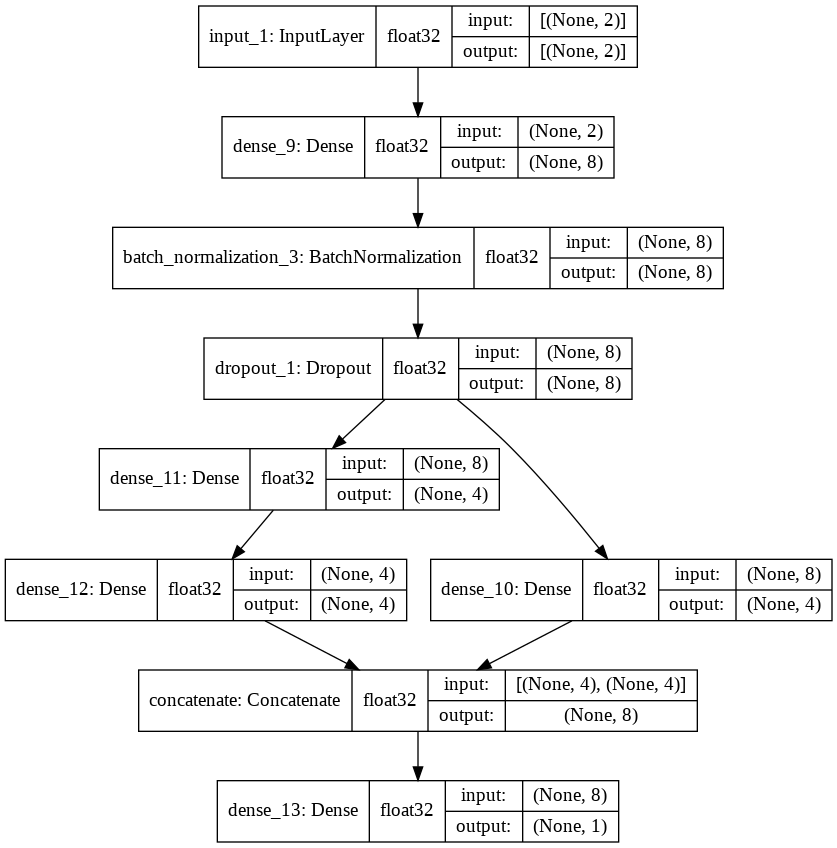

In [10]:
from tensorflow.keras import Input

input = Input(shape=[2]) # all you need to do is to indicate the shape of the
# input data that will come in the model

# we can than instanciate the layers we will use in the model
dense1 = Dense(8,"relu")
dense2a = Dense(4,"relu")
dense2b = Dense(4,"relu")
dense2c = Dense(4,"relu")
dense3 = Dense(1,"sigmoid")
bn = BatchNormalization()
do = Dropout(0.2)

# then let's start building the model by feeding the input to the first layer
# then to all the other layers
x = dense1(input)
x = bn(x)
x = do(x)
xa = dense2a(x)
xb = dense2b(x)
xc = dense2c(xb)
x = tf.keras.layers.concatenate([xa,xc])
output = dense3(x)

print('output:',output)

model = tf.keras.Model(inputs=input, outputs=output) # we now can form the model
# by using the class Model and passing it two arguments, the argument inputs 
# that needs to be of the class Input or a list of Input, and outputs that needs to be a tensor
# or list of tensors

tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

This technique is extremely useful because it makes it possible to deviate from the sequential architecture and make models with much more original ways or transforming inputs into outputs.

### The last layer 🔚

Before we move on with the lecture, we would like to insist on a very important aspect of building models with Keras. We saw that it was important to specify the input shape on the first layer of the model in order to be able to visualize our model with the methods `.summary()` and `tf.utils.plot_model()`. It is just as important to choose the final layer for the model according to the target variable we are trying to predict.

For example, if we are dealing with a regression problem and $y$ can take any value in $\mathbb{R}$, then the last layer should be a `Dense` layer with one neuron on it and a linear activation function so the output value is not limited in its range. If we are dealing with a classification problem with 10 classes, we need a `Dense` layer with 10 neurons on it and a `softmax` activation function, so the output represents the probability distribution accross the 10 classes of the target variable.

### Make a forward pass with the model ➡️

Remember the forward pass from yesterday's lecture? Well now that we know how to build models with tensorflow and Keras, we are now going to learn how to transform the inputs into outputs with our models.

Let's see how using code!

In [11]:
# Let's reuse the sequential model we used before
sequential_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 24        
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 97
Trainable params: 81
Non-trainable params: 16
_________________________________________________________________


In [12]:
# Let's now create some input data in order to feed to the model
data = np.array([[1,2]]) # we have to make a two dimensional array
# with a number of rows and two columns because the input_shape is [2] which
# translates to (None, 2) when you add the batch size.

# Let's now feed this data to the model
# The model class has a __call__ method so we can simply it as a function
print("model output:",sequential_model(data))

# The model is not trained yet but this is actually what predictions will look
# like when it will be

model output: tf.Tensor([[0.5]], shape=(1, 1), dtype=float32)


### Manipulations on model objects 👈

Now that we know how to build models and make a forward pass, let's dig a little deeper and explore some other attributes and methods associated with model objects.

#### Extract weights/parameters

It can be difficult to interpret what deep learning models do and how they do it, and sometimes being able to see the weights inside the network make it possible to clarify what's going on. Let's discover how we can get the weights from the neural network model with code!

In [13]:
# Let's use the non-sequential model for a change, although this technique works
# on any objectof class Model
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

print("Model parameters:", model.variables)

# The attribute variables gives you access to all the parameters of the model
# trainable and non-trainable, you see here that this attribute is a list of
# variable tensor objects with names corresponding to the names of the layers
# they are attached to
print("\n ----------------------------------------------------------- \n")
print("Model trainable parameters:", model.trainable_variables)

# If you wish to retrieve only the trainable weights of the model (and this will
# come in handy when we learn more about tf) you may use the trainable_variables
# attribute.

Model parameters: [<tf.Variable 'dense_9/kernel:0' shape=(2, 8) dtype=float32, numpy=
array([[-0.5946521 ,  0.28459954,  0.39717805, -0.35661867, -0.30590343,
        -0.17988586, -0.6898818 , -0.5421071 ],
       [-0.7568759 ,  0.7406719 ,  0.35436285,  0.20985156, -0.05719483,
         0.719517  , -0.34202597, -0.26949966]], dtype=float32)>, <tf.Variable 'dense_9/bias:0' shape=(8,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>, <tf.Variable 'batch_normalization_3/gamma:0' shape=(8,) dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>, <tf.Variable 'batch_normalization_3/beta:0' shape=(8,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>, <tf.Variable 'batch_normalization_3/moving_mean:0' shape=(8,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>, <tf.Variable 'batch_normalization_3/moving_variance:0' shape=(8,) dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1.], d

#### Extract layer specific content

It is also possible to see exactly what's happening in a specific layer using some methods associated with model objects, let's see how:

In [14]:
# Let's display the names of all the layers in the model:
for layer in model.layers:
  print(layer.name)

input_1
dense_9
batch_normalization_3
dropout_1
dense_11
dense_10
dense_12
concatenate
dense_13


In [15]:
# Let's for example get the specific content of layer dense_31
specific_layer = model.layers[1]
specific_layer = model.get_layer(name=model.layers[1].name)

# we can extract the weights from this specific layer
specific_layer.trainable_variables

[<tf.Variable 'dense_9/kernel:0' shape=(2, 8) dtype=float32, numpy=
 array([[-0.5946521 ,  0.28459954,  0.39717805, -0.35661867, -0.30590343,
         -0.17988586, -0.6898818 , -0.5421071 ],
        [-0.7568759 ,  0.7406719 ,  0.35436285,  0.20985156, -0.05719483,
          0.719517  , -0.34202597, -0.26949966]], dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(8,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [16]:
# Because the weights are variable tensors we may assing new values to them
specific_layer.bias.assign([1,2,3,4,5,6,7,8])
print("Bias:",specific_layer.bias) # accesses the bias
# the values in the layer are now changedin place, which means the model was 
# affected as well
print("\n --------------------------------- \n")

# we will assign the value zero to each weight in the layer's kernel, aka the 
# weights that are not part of the bias
specific_layer.kernel.assign(tf.zeros_like(specific_layer.kernel))
print("Kernel/parameters:",specific_layer.kernel)

Bias: <tf.Variable 'dense_9/bias:0' shape=(8,) dtype=float32, numpy=array([1., 2., 3., 4., 5., 6., 7., 8.], dtype=float32)>

 --------------------------------- 

Kernel/parameters: <tf.Variable 'dense_9/kernel:0' shape=(2, 8) dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>


In [17]:
# We can also extract the output of that layer, which can be very useful if you
# wish to see what is coming out of a specific layer
specific_layer.output

# we can now create a new model
model_intermediate = tf.keras.Model(inputs=model.input, outputs=specific_layer.output)
model_intermediate(data)

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[1., 2., 3., 4., 5., 6., 7., 8.]], dtype=float32)>

## Prepare the model for training 🏃🏃

We are almost ready to train our model, we are still missing a few steps, we will need to choose the loss function that we wish to optimize, the specific implementation of the gradient descent we wish to use (there are several) and also choose a learning rate. Let's see how we can do all that with code!

### Loss functions 💰

They are many loss functions already implemented in tensorflow which you may consult <a href="https://www.tensorflow.org/api_docs/python/tf/keras/losses"> here </a>. 

In this section we will do a quick overview of the various loss functions in tensorflow and the specific problems they help solve.

In [18]:
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy

# MSE
# ideal for most regression problems
mse = MeanSquaredError()
print("mse:",mse([[1]],[[2]]))

# Binary Cross Entropy : - log(P(y=1))
# ideal for binary classification problems
bce = BinaryCrossentropy()
print("Binary cross entropy:", bce([[0]], [[0.12]]))

# Categorical cross entropy : - sum y==i x log(P(y==i))
# Ideal for multi class classification problems
# non Sparse for problems where the target variable is in dummy form
cce = CategoricalCrossentropy()
print("Categorical cross entropy:", cce([[0,0,0,1]],[[0.2,0.1,0.15,0.55]]))
# Sparse for problems where the target is in index form
scce = SparseCategoricalCrossentropy()
print("Sparse categorical cross entropy:", scce([[3]],[[0.2,0.1,0.15,0.55]]))

mse: tf.Tensor(1, shape=(), dtype=int32)
Binary cross entropy: tf.Tensor(0.12783325, shape=(), dtype=float32)
Categorical cross entropy: tf.Tensor(0.597837, shape=(), dtype=float32)
Sparse categorical cross entropy: tf.Tensor(0.597837, shape=(), dtype=float32)


### Optimizers 📈

Optimizers is a module of Keras that gives you access to different variants of the gradient descent algorithm which you may find more detail about <a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers"> here </a>.

Here we will mostly focus on two things, the Adam optimizer on the one hand, and how to build a learning rate schedule on the other hand.



#### Adam

Adam is an adaptive implementation of the stochastic gradient descent algorithm, it is adaptive in the sense that the learning rate will marginally adapt itself according to the value of the gradient. Roughly speaking it increases the learning rate when the gradient gets smaller to accelerate training and decreases the learning rate when the gradient get bigger in order to prevent the training steps to go over a potential minimum.

In [6]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001) # For this optimizer we can define the base
# learning rate that the algorithm will use and adapt during training

#### Learning rate schedules

In adition to the choice of algorithm, it is also possible to define what we call a learning rate schedule that will influence the base learning rate throughout the training. You may find ressources on all the available learning rate schedules following <a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules"> this link </a>. In this lecture and the examples and exercises of this course we will only use one of them which is the `ExponentialDecay`.

This learning rate schedule will cause the learning rate to exponentially decrease to zero during training, this is useful for models that tend to learn and overfit very quickly so the training process slows down after a few epochs.

Let's how it works with code!

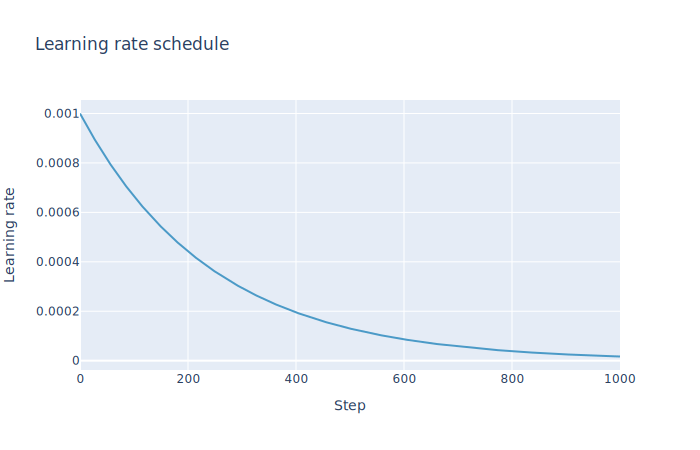

In [7]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# We need to define the initial learning rate, decay_steps indicates the number
# of steps before the learning rate decreases of one time the decay_rate.
ed = ExponentialDecay(
    initial_learning_rate = 0.001, decay_steps = 100, decay_rate = 0.96
)

# The call of the Exponential decay instance works in the following way
initial_learning_rate = 0.001
decay_steps = 10
decay_rate = 0.96
def decayed_learning_rate(step):
    return initial_learning_rate * decay_rate ** (step / decay_steps)
x = np.linspace(0,1000,1000)

# Let's see how this works visually
fig = go.Figure(data=[
                      go.Scatter(
                          x = x,
                          y = decayed_learning_rate(x),
                          mode = "lines",
                          line=dict(
                              color = color_chart[0]
                            ),
                          name = "learning rate"
                          )
])

fig.update_layout(
    title="Learning rate schedule",
    xaxis_title="Step",
    yaxis_title="Learning rate"
    )

fig.show("svg")

# If you wish to add this learning rate schedule to your optimizer you can do it
# as follows
opt_schedule = Adam(learning_rate=ed)

### Compile 🎁

Once you have built the model, chose the loss function, defined an optimizer with a learning rate or learning rate schedule you need to bring it all together with a final method called `.compile`. This operation will assign the optimizer and the loss function to the model.

Let's do it with code!

In [21]:
# Let's compile our model
model.compile(optimizer=opt,
              loss=bce)

This is the minimal version of the compiling operation, but you may also wish to monitor some performance metrics during training. All the available performance metrics can be found <a href="https://www.tensorflow.org/api_docs/python/tf/keras/metrics"> here </a>.

Let's add a metric to the compile operation.

In [22]:
from tensorflow.keras.metrics import BinaryAccuracy

model.compile(optimizer=opt,
              loss=bce,
              metrics=[BinaryAccuracy()])
# the argument metrics takes a list of metrics from keras

We are now ready to train our model!

## Model training 💦💦

The model training step is actually very easy now that we have done all this, let's show a full example with an easy dataset.

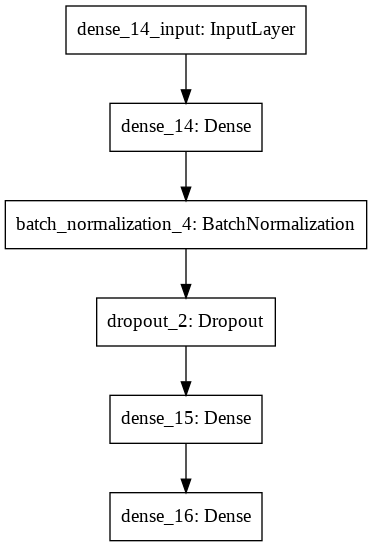

In [23]:
from sklearn.datasets import load_iris

iris = load_iris() # load the data

data = iris.data # store training variables in data
target = iris.target # store target variable in target

from sklearn.model_selection import train_test_split
# Split 60% in train 20% in val 20% in test
X_train, X_valtest, y_train, y_valtest = train_test_split(data,
                                                          target,
                                                          test_size=0.4,
                                                          stratify=target)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest,
                                                test_size=0.5,
                                                stratify=y_valtest)

# Normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Create the tensor slice datasets
train = tf.data.Dataset.from_tensor_slices((X_train,y_train))
val = tf.data.Dataset.from_tensor_slices((X_val,y_val))
test = tf.data.Dataset.from_tensor_slices((X_test,y_test))

# shuffle and batch
train_batch = train.shuffle(len(X_train)).batch(4)
val_batch = val.shuffle(len(X_val)).batch(4)
test_batch = test.shuffle(len(X_test)).batch(4)

# Create the model
model = Sequential([
                    # input shape equals to the number of training variables
                    Dense(8,"relu",input_shape=[data.shape[1]]), 
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(4,"relu"),
                    # number of neurons on last layer equal to number of classes 
                    # with softmax activation for mutli class classification
                    Dense(len(np.unique(target)), "softmax") 
])

# display the model
tf.keras.utils.plot_model(model)

In [24]:
# Set up the optimizer
opt = Adam(0.001)
# define the loss function
loss = SparseCategoricalCrossentropy()
# define the performance metric
metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Compile the model
model.compile(optimizer=opt,
              loss=loss,
              metrics=[metric])

In [25]:
# We use .fit in order to start training the model
# the first argument is the the batch dataset containing the training data
# epochs indicates the number of epochs (the number of times each batch is going
# to be used for training) to train for
# validation_data is the data we use to measure overfitting during training, the 
# model will not train on this data but compute the performance metrics on it at
# the end of each epoch
history = model.fit(train_batch, epochs=10, validation_data=val_batch)

# We save the training in an object history so we can retreive the training
# information later on.

print("\n ------ \n","training history:",history.history)

Epoch 1/10
23/23 [==============================] - 1s 25ms/step - loss: 1.4133 - sparse_categorical_accuracy: 0.3269 - val_loss: 1.0340 - val_sparse_categorical_accuracy: 0.3333
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 1.1990 - sparse_categorical_accuracy: 0.3244 - val_loss: 1.0084 - val_sparse_categorical_accuracy: 0.3667
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 1.1164 - sparse_categorical_accuracy: 0.4138 - val_loss: 0.9906 - val_sparse_categorical_accuracy: 0.4333
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 1.1962 - sparse_categorical_accuracy: 0.3175 - val_loss: 0.9715 - val_sparse_categorical_accuracy: 0.4667
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 1.0801 - sparse_categorical_accuracy: 0.4138 - val_loss: 0.9521 - val_sparse_categorical_accuracy: 0.4667
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 1.0798 - sparse_categorical_accuracy:

In [26]:
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'    
)
fig.show()

In [27]:
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["sparse_categorical_accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[4]
                          )),
                      go.Scatter(
                          y=history.history["val_sparse_categorical_accuracy"],
                          name="Validation accruracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[5]
                          ))
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'    
)
fig.show()

We are able to visualize the evolution of the loss and the metrics during training on both the training set and the validation set. The validation set is not helpful for the training per se but makes it easy to see if the model starts over fitting. Let's give an example where the model overfits after a while.

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # load the data

data = cancer.data # store training variables in data
target = cancer.target # store target variable in target

from sklearn.model_selection import train_test_split
# Split 60% in train 20% in val 20% in test
X_train, X_valtest, y_train, y_valtest = train_test_split(data,
                                                          target,
                                                          test_size=0.4,
                                                          stratify=target)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest,
                                                test_size=0.5,
                                                stratify=y_valtest)

# Normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Create the tensor slice datasets
train = tf.data.Dataset.from_tensor_slices((X_train,y_train))
val = tf.data.Dataset.from_tensor_slices((X_val,y_val))
test = tf.data.Dataset.from_tensor_slices((X_test,y_test))

# shuffle and batch
train_batch = train.shuffle(len(X_train)).batch(4)
val_batch = val.shuffle(len(X_val)).batch(4)
test_batch = test.shuffle(len(X_test)).batch(4)

model = Sequential([
                    Dense(64,"relu",input_shape=[data.shape[1]]),
                    Dense(32,"relu"),
                    Dense(16,"relu"),
                    Dense(8,"relu"),
                    Dense(len(np.unique(target)), "softmax") 
])

# Set up the optimizer
opt = Adam(0.001)
# define the loss function
loss = SparseCategoricalCrossentropy()
# define the performance metric
metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Compile the model
model.compile(optimizer=opt,
              loss=loss,
              metrics=[metric])

history = model.fit(train_batch, epochs=40, validation_data=val_batch)

Epoch 1/40
86/86 [==============================] - 1s 4ms/step - loss: 0.4735 - sparse_categorical_accuracy: 0.7566 - val_loss: 0.1591 - val_sparse_categorical_accuracy: 0.9298
Epoch 2/40
86/86 [==============================] - 0s 2ms/step - loss: 0.0620 - sparse_categorical_accuracy: 0.9772 - val_loss: 0.1207 - val_sparse_categorical_accuracy: 0.9561
Epoch 3/40
86/86 [==============================] - 0s 2ms/step - loss: 0.0317 - sparse_categorical_accuracy: 0.9947 - val_loss: 0.1060 - val_sparse_categorical_accuracy: 0.9825
Epoch 4/40
86/86 [==============================] - 0s 2ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.1378 - val_sparse_categorical_accuracy: 0.9561
Epoch 5/40
86/86 [==============================] - 0s 2ms/step - loss: 0.0106 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.1674 - val_sparse_categorical_accuracy: 0.9561
Epoch 6/40
86/86 [==============================] - 0s 2ms/step - loss: 0.0109 - sparse_categorical_accuracy: 

In [29]:
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
# Add shapes
fig.add_shape(type="line",
    x0=np.argmin(history.history["val_loss"]),
    y0=np.min(history.history["loss"]),
    x1=np.argmin(history.history["val_loss"]),
    y1=np.max(history.history["loss"]),
    line=dict(color="red",width=3,dash="dot"),
    name="overfitting limit"
)
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'    
)
fig.show()

In terms of the loss function, this model starts over fitting after the red dotted line, unfortunately we continued the training after this point and we do not have access to the parameters of the model before it started overfitting.

In what follows we will learn how to tackle that problem, but first, let's learn how to make predictions!

## Make predictions 🔮🔮

Now that the model is trained, we are ready to make predictions and evaluate the model!

In [30]:
# Let's make predictions on the first batch of the test set
test_input, test_target = next(iter(test_batch))
pred = model.predict(test_input)
pred
# we get one porbability for each class

array([[1.47105800e-06, 9.99998569e-01],
       [1.09372606e-11, 1.00000000e+00],
       [1.08069775e-10, 1.00000000e+00],
       [1.71308341e-06, 9.99998331e-01]], dtype=float32)

In [31]:
# let's convert these predictions into classes
tf.argmax(pred, axis = 1)

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 1, 1, 1])>

In [32]:
# let's take a look at the target values
test_target

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 1, 1, 1])>

## Load and Save models 💾💾

We have now learned almost all the basics of tensorflow and keras and you are almost ready to tackle many different problems using deep learning models! But before we let you practice we will teach you one last and very useful set of skills: how to save your models to be able to use them later!



### Checkpoints ✔️

Checkpoints are versions of the model that we save directly during training, this is very useful because if the model starts overfitting after a while we won't lose the intermediate versions and we will be able to go back to a version of the model before it started overfitting! Is'nt that great?

Let's learn how to do it with code!

In [33]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training/cp-{epoch:04d}.ckpt" # the path where checkpoint files
# will be stored

# Create a callback that saves the model's weights every epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    save_freq=1*len(train_batch))

# Create a new model instance
model = Sequential([
                    Dense(64,"relu",input_shape=[data.shape[1]]),
                    Dense(32,"relu"),
                    Dense(16,"relu"),
                    Dense(8,"relu"),
                    Dense(len(np.unique(target)), "softmax") 
])

# Set up the optimizer
opt = Adam(0.001)
# define the loss function
loss = SparseCategoricalCrossentropy()
# define the performance metric
metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Compile the model
model.compile(optimizer=opt,
              loss=loss,
              metrics=[metric])

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model.fit(train_batch,
          epochs=40, 
          callbacks=[cp_callback],
          validation_data=val_batch)

Epoch 1/40
64/86 [=====================>........] - ETA: 0s - loss: 0.6027 - sparse_categorical_accuracy: 0.6281
Epoch 00001: saving model to training/cp-0001.ckpt
86/86 [==============================] - 1s 5ms/step - loss: 0.5572 - sparse_categorical_accuracy: 0.6799 - val_loss: 0.1767 - val_sparse_categorical_accuracy: 0.9474
Epoch 2/40
72/86 [========================>.....] - ETA: 0s - loss: 0.0995 - sparse_categorical_accuracy: 0.9638
Epoch 00002: saving model to training/cp-0002.ckpt
86/86 [==============================] - 0s 3ms/step - loss: 0.0969 - sparse_categorical_accuracy: 0.9651 - val_loss: 0.1159 - val_sparse_categorical_accuracy: 0.9561
Epoch 3/40
69/86 [=======================>......] - ETA: 0s - loss: 0.0295 - sparse_categorical_accuracy: 0.9965
Epoch 00003: saving model to training/cp-0003.ckpt
86/86 [==============================] - 0s 3ms/step - loss: 0.0323 - sparse_categorical_accuracy: 0.9947 - val_loss: 0.1416 - val_sparse_categorical_accuracy: 0.9474
Epoch 4

In [34]:
# To load a checkpoint 
model.load_weights("/content/training/cp-0004.ckpt")
model.evaluate(val_batch)

29/29 [==============================] - 0s 1ms/step - loss: 0.1166 - sparse_categorical_accuracy: 0.9649


[0.1166333556175232, 0.9649122953414917]

### Save 💽

You can also save the model after the fact

In [ ]:
model.save("model.h5")

### Load 📀

And load it after this even later in a different notebook or script.

In [ ]:
restored_model = tf.keras.models.load_model("/content/model.h5")
restored_model.evaluate(val_batch)

29/29 [==============================] - 0s 1ms/step - loss: 0.3707 - sparse_categorical_accuracy: 0.9649


[0.3706941306591034, 0.9649122953414917]

That was a long demo, but you are now all equipped to tackle many different problems with tensorflow with deep neural network models. Now let's get to the exercises to start getting some practice!

## Ressources 📚📚

* <a href="https://www.tensorflow.org/tutorials/quickstart/beginner"> An easy tutorial on the MNIST dataset </a>
* <a href="https://www.tensorflow.org/datasets/catalog/overview"> Official tensorflow datasets for you to practice on </a>
* <a href="https://research.google/tools/datasets/"> Other datasets made available by Google </a>
* <a href="https://datasetsearch.research.google.com/"> Google dataset search bard </a>